In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
import mglearn
from sklearn.ensemble import RandomForestClassifier

In [4]:
 
filename = "adult.csv"
df = pd.read_csv(filename)

# one hot encoding
df_dummies = pd.get_dummies(df)

In [5]:
for i in df.columns:
    print("\n\n\nColumn ", i, ":\n", df[i].value_counts())




Column  age :
 36    898
31    888
34    886
23    877
35    876
33    875
28    867
30    861
37    858
25    841
27    835
32    828
38    827
39    816
29    813
41    808
24    798
40    794
26    785
42    780
43    770
22    765
20    753
46    737
45    734
44    724
21    720
19    712
47    708
50    602
     ... 
60    312
61    300
62    258
63    230
64    208
65    178
67    151
66    150
68    120
69    108
70     89
71     72
72     67
73     64
74     51
76     46
75     45
90     43
77     29
78     23
80     22
79     22
81     20
82     12
84     10
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64



Column  workclass :
 Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64



Column  fnlwgt :
 123011     13
203488     13

In [6]:
# check result of one hot encoding
for i in df_dummies.columns:
    print("\n\n\nColumn ", i, ":\n", df_dummies[i].value_counts())




Column  age :
 36    898
31    888
34    886
23    877
35    876
33    875
28    867
30    861
37    858
25    841
27    835
32    828
38    827
39    816
29    813
41    808
24    798
40    794
26    785
42    780
43    770
22    765
20    753
46    737
45    734
44    724
21    720
19    712
47    708
50    602
     ... 
60    312
61    300
62    258
63    230
64    208
65    178
67    151
66    150
68    120
69    108
70     89
71     72
72     67
73     64
74     51
76     46
75     45
90     43
77     29
78     23
80     22
79     22
81     20
82     12
84     10
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64



Column  fnlwgt :
 123011     13
203488     13
164190     13
126675     12
121124     12
113364     12
148995     12
123983     11
190290     11
241998     11
188246     11
120131     11
111483     11
102308     11
126569     11
155659     11
120277     11
174789     10
125933     10
112497     10
193882     10
186934     10
177675 




Column  occupation_Priv-house-serv :
 0    32412
1      149
Name: occupation_Priv-house-serv, dtype: int64



Column  occupation_Prof-specialty :
 0    28421
1     4140
Name: occupation_Prof-specialty, dtype: int64



Column  occupation_Protective-serv :
 0    31912
1      649
Name: occupation_Protective-serv, dtype: int64



Column  occupation_Sales :
 0    28911
1     3650
Name: occupation_Sales, dtype: int64



Column  occupation_Tech-support :
 0    31633
1      928
Name: occupation_Tech-support, dtype: int64



Column  occupation_Transport-moving :
 0    30964
1     1597
Name: occupation_Transport-moving, dtype: int64



Column  relationship_Husband :
 0    19368
1    13193
Name: relationship_Husband, dtype: int64



Column  relationship_Not-in-family :
 0    24256
1     8305
Name: relationship_Not-in-family, dtype: int64



Column  relationship_Other-relative :
 0    31580
1      981
Name: relationship_Other-relative, dtype: int64



Column  relationship_Own-child :
 0    2749

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


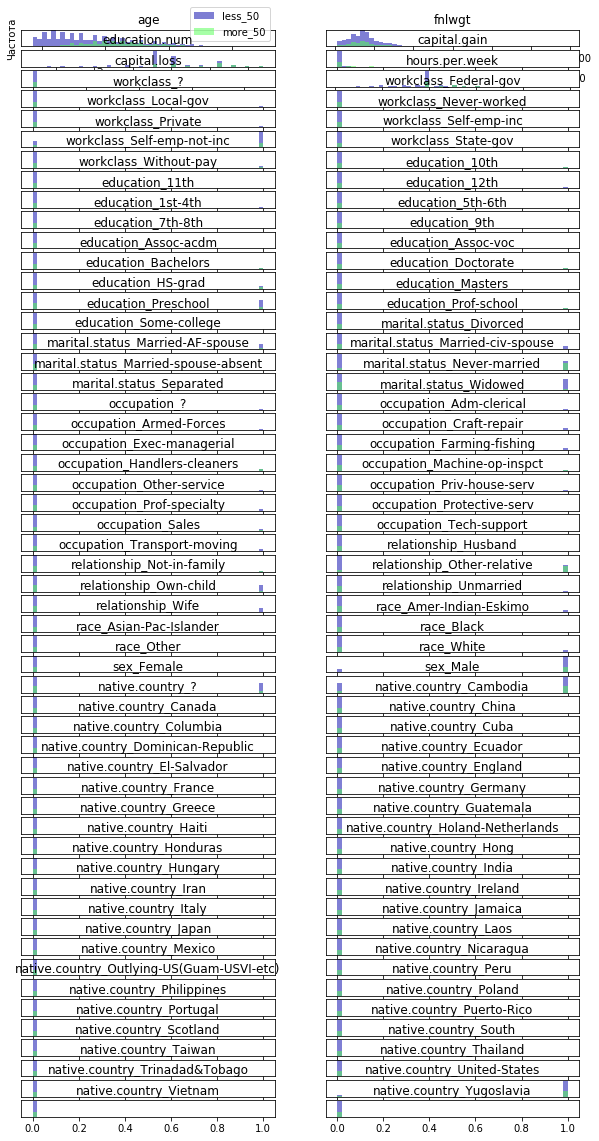

In [7]:
fig, axes = plt.subplots(54, 2, figsize=(10, 20))
less_50 = df_dummies[:-2][df_dummies['income_<=50K'] == 1]
more_50 = df_dummies[:-2][df_dummies['income_>50K'] == 1]
ax = axes.ravel()

for i in range(len(df_dummies.columns[:-2].tolist())):
    _, bins = np.histogram(df_dummies.iloc[:, i], bins=50)
    ax[i].hist(less_50.iloc[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(more_50.iloc[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(df_dummies.columns[i])
    ax[i].set_yticks(())
    
ax[0].set_xlabel("Значение признака")
ax[0].set_ylabel("Частота")
ax[0].legend(["less_50", "more_50"], loc="best")
fig.tight_layout()